## Abstract: 

The assignment gave the liberty to select dataset, so I have decided to use, AirBnB listing dataset, which has 37 features and log price of that particular listing as output. The dataset contains 74,112 records from which 80% data is used for training of different models, while 20% test data is used for evaluation of that model. First task that I performed on data is to do a exploratory data analysis to reduce number of feature and get a hint about how data is distributed and how clean data is. I have removed some of the unnecessary features such as URL to the listing, thumbnails. Also, performed Principal Component Analysis(PCA) in order to reduce the dimensions of the features. I then performed correlation analysis by plotting cor plot between features and output to know more about the data. Then I performed label encoding for data that was represented by strings to convert them into categorical numerical values. Using different Feature extraction techniques like Forward Feature Selection, LASSO, Recurrsive Feature Elimination(RFE) ranks of the features were calculated. Using the ranks I I, tried to fit a linear model with those features and got the P values out of it. Then I checked whether or not the model was violating any of the assumptions that were made by using scatter plots to check linear relations between features, QQ plots to check multivariate normality, Homoscedasticity Test. Then I trained the Linear Regression model,plotted the residuals and calculated AIC,BIC and R^2. I also performed cross validation to ensure the model was not overfitting. Then in the same notebook, I trained a logistic regression model over the same dataset with same split on the dataset, again validated the assumptions which are mentioned in detail in the notebook. One more think I did was to print out the confidence interval of each feature used in the model to understand the model better. I have also applied the stepwise regression model on data and introduced bias on the linear regression line by regularising it.

## AirBnB Listings: Model 3

In [151]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from scipy import stats 
import seaborn as sns
import statsmodels.api as sm 
import re 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from statsmodels.formula.api import ols

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Imputer
from sklearn import preprocessing 
from sklearn.pipeline import make_pipeline
import math
from sklearn import metrics 


In [152]:
df = pd.read_csv("train_backup.csv")
import copy 
df_copy = copy.copy(df)

In [153]:
def label_encoding(*args):
    le = LabelEncoder()
    for i in args:
        le.fit(df[i].fillna('0'))
        
        transformed_pt = pd.DataFrame(le.transform(df[i].fillna('0')))
        df[i+'numerical'] = transformed_pt.values
    return df


In [154]:
label_encoding('property_type','room_type','amenities','bed_type','cancellation_policy','cleaning_fee','city','neighbourhood','host_has_profile_pic','host_response_rate','host_identity_verified','instant_bookable')
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,amenitiesnumerical,bed_typenumerical,cancellation_policynumerical,cleaning_feenumerical,citynumerical,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,6142,4,2,1,4,78,2,0,2,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,6269,4,2,1,4,253,2,3,1,1
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,21345,4,1,1,4,248,2,3,2,1
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,38854,4,0,1,5,326,2,0,2,0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,55413,4,1,1,2,120,2,3,2,1
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,50079,4,2,1,5,392,2,3,2,1
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,63351,4,1,1,3,0,2,3,1,1
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,22670,4,1,1,3,151,2,3,2,0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,22639,4,1,1,5,457,2,3,1,0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,3774,4,1,1,3,0,2,3,1,1


In [155]:
df.corr()

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,...,amenitiesnumerical,bed_typenumerical,cancellation_policynumerical,cleaning_feenumerical,citynumerical,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical
id,1.000000,-0.007178,-0.005759,-0.003951,-0.003059,-0.003021,-0.001379,0.002945,0.000307,-0.007521,...,-0.002488,-0.003818,-0.003019,-0.003059,0.003324,0.000526,0.000243,0.003518,-0.002173,0.002497
log_price,-0.007178,1.000000,0.567574,0.355420,0.111191,-0.002193,-0.047529,-0.032470,0.091219,0.473212,...,0.129984,0.093780,0.131869,0.111191,0.030913,0.101222,-0.003398,-0.011957,0.024358,-0.044271
accommodates,-0.005759,0.567574,1.000000,0.505632,0.182306,-0.078309,-0.085160,0.041964,-0.017128,0.709258,...,0.097348,0.074654,0.207242,0.182306,-0.102428,-0.002897,0.008934,0.065188,0.059426,0.053093
bathrooms,-0.003951,0.355420,0.505632,1.000000,0.053784,-0.137959,-0.135026,-0.041381,0.010537,0.589935,...,0.036289,0.038730,0.087903,0.053784,-0.076328,-0.000157,0.010605,0.047341,0.016936,0.001461
cleaning_fee,-0.003059,0.111191,0.182306,0.053784,1.000000,-0.060913,-0.068505,0.110204,0.034879,0.105454,...,0.053121,0.032604,0.336007,1.000000,-0.019377,0.023989,0.010371,0.055520,0.159700,0.010031
latitude,-0.003021,-0.002193,-0.078309,-0.137959,-0.060913,1.000000,0.896065,-0.017642,-0.032858,-0.059162,...,-0.107434,0.001551,0.010935,-0.060913,-0.013952,0.000857,-0.026535,-0.041817,-0.047911,-0.006090
longitude,-0.001379,-0.047529,-0.085160,-0.135026,-0.068505,0.896065,1.000000,-0.050009,-0.048801,-0.076113,...,-0.123669,0.002134,0.001727,-0.068505,-0.070637,-0.049201,-0.032137,-0.029813,-0.065222,-0.002371
number_of_reviews,0.002945,-0.032470,0.041964,-0.041381,0.110204,-0.017642,-0.050009,1.000000,0.011708,-0.035149,...,0.009781,0.006444,0.191475,0.110204,-0.022224,0.027297,0.011960,0.039396,0.159950,0.077276
review_scores_rating,0.000307,0.091219,-0.017128,0.010537,0.034879,-0.032858,-0.048801,0.011708,1.000000,0.011143,...,0.035067,0.000894,-0.025431,0.034879,-0.018799,0.020027,0.004399,-0.088162,0.055108,-0.068874
bedrooms,-0.007521,0.473212,0.709258,0.589935,0.105454,-0.059162,-0.076113,-0.035149,0.011143,1.000000,...,0.057596,0.054038,0.127468,0.105454,-0.065203,-0.006065,0.009127,0.025311,0.027319,-0.003654


## Smoothing the highest correlated features with log price

In [156]:
df['bathrooms^2'] = df['bathrooms']**2
df['accommodates^2'] = df['accommodates']**2
df['room_typenumerical^2'] = df['room_typenumerical']**2
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,cleaning_feenumerical,citynumerical,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical,bathrooms^2,accommodates^2,room_typenumerical^2
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,1,4,78,2,0,2,0,1.00,9,0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,1,4,253,2,3,1,1,1.00,49,0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,1,4,248,2,3,2,1,1.00,25,0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,1,5,326,2,0,2,0,1.00,16,0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,1,2,120,2,3,2,1,1.00,4,0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,1,5,392,2,3,2,1,1.00,4,1
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,1,3,0,2,3,1,1,1.00,9,0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,1,3,151,2,3,2,0,1.00,4,0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,1,5,457,2,3,1,0,1.00,4,1
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,1,3,0,2,3,1,1,1.00,4,1


In [157]:
df.corr()

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,...,cleaning_feenumerical,citynumerical,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical,bathrooms^2,accommodates^2,room_typenumerical^2
id,1.000000,-0.007178,-0.005759,-0.003951,-0.003059,-0.003021,-0.001379,0.002945,0.000307,-0.007521,...,-0.003059,0.003324,0.000526,0.000243,0.003518,-0.002173,0.002497,-0.003634,-0.007991,0.007305
log_price,-0.007178,1.000000,0.567574,0.355420,0.111191,-0.002193,-0.047529,-0.032470,0.091219,0.473212,...,0.111191,0.030913,0.101222,-0.003398,-0.011957,0.024358,-0.044271,0.294379,0.457459,-0.531686
accommodates,-0.005759,0.567574,1.000000,0.505632,0.182306,-0.078309,-0.085160,0.041964,-0.017128,0.709258,...,0.182306,-0.102428,-0.002897,0.008934,0.065188,0.059426,0.053093,0.432831,0.925645,-0.367135
bathrooms,-0.003951,0.355420,0.505632,1.000000,0.053784,-0.137959,-0.135026,-0.041381,0.010537,0.589935,...,0.053784,-0.076328,-0.000157,0.010605,0.047341,0.016936,0.001461,0.925115,0.502324,-0.069520
cleaning_fee,-0.003059,0.111191,0.182306,0.053784,1.000000,-0.060913,-0.068505,0.110204,0.034879,0.105454,...,1.000000,-0.019377,0.023989,0.010371,0.055520,0.159700,0.010031,0.034995,0.125637,-0.189111
latitude,-0.003021,-0.002193,-0.078309,-0.137959,-0.060913,1.000000,0.896065,-0.017642,-0.032858,-0.059162,...,-0.060913,-0.013952,0.000857,-0.026535,-0.041817,-0.047911,-0.006090,-0.123209,-0.071287,-0.005677
longitude,-0.001379,-0.047529,-0.085160,-0.135026,-0.068505,0.896065,1.000000,-0.050009,-0.048801,-0.076113,...,-0.068505,-0.070637,-0.049201,-0.032137,-0.029813,-0.065222,-0.002371,-0.115908,-0.074005,0.006092
number_of_reviews,0.002945,-0.032470,0.041964,-0.041381,0.110204,-0.017642,-0.050009,1.000000,0.011708,-0.035149,...,0.110204,-0.022224,0.027297,0.011960,0.039396,0.159950,0.077276,-0.035699,0.019700,-0.037602
review_scores_rating,0.000307,0.091219,-0.017128,0.010537,0.034879,-0.032858,-0.048801,0.011708,1.000000,0.011143,...,0.034879,-0.018799,0.020027,0.004399,-0.088162,0.055108,-0.068874,0.006473,-0.015808,-0.051745
bedrooms,-0.007521,0.473212,0.709258,0.589935,0.105454,-0.059162,-0.076113,-0.035149,0.011143,1.000000,...,0.105454,-0.065203,-0.006065,0.009127,0.025311,0.027319,-0.003654,0.507787,0.656295,-0.197898


In [158]:
median_price_df = df.sort_values('log_price', ascending=False)
median_price = np.array(median_price_df[['log_price']].median())

sample = pd.DataFrame(np.where(df[['log_price']].values >= median_price, 1, 0))
df['log_price_numerical'] = sample
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,citynumerical,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical,bathrooms^2,accommodates^2,room_typenumerical^2,log_price_numerical
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,4,78,2,0,2,0,1.00,9,0,1
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,4,253,2,3,1,1,1.00,49,0,1
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,4,248,2,3,2,1,1.00,25,0,1
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,5,326,2,0,2,0,1.00,16,0,1
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,2,120,2,3,2,1,1.00,4,0,1
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,5,392,2,3,2,1,1.00,4,1,0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,3,0,2,3,1,1,1.00,9,0,0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,3,151,2,3,2,0,1.00,4,0,1
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,5,457,2,3,1,0,1.00,4,1,1
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,3,0,2,3,1,1,1.00,4,1,0


In [181]:
col_to_use_linear = ['accommodates','accommodates^2','room_typenumerical','room_typenumerical^2','bathrooms','bedrooms','citynumerical','cleaning_feenumerical','neighbourhoodnumerical']

In [182]:
df['log_price'].fillna(df['log_price'].mean())
print(df['log_price'].isnull().sum())

for x in col_to_use_linear:
    df[x]= df[x].fillna(df[x].mean())
df[col_to_use_linear].isnull().sum()

0


accommodates              0
accommodates^2            0
room_typenumerical        0
room_typenumerical^2      0
bathrooms                 0
bedrooms                  0
citynumerical             0
cleaning_feenumerical     0
neighbourhoodnumerical    0
dtype: int64

## Dimensionality Decomposition using Principal Component Analysis (PCA)

#### In order to preserve maximal data variance and remove some of the smaller prinicipal feature, we have to use Principal Component Analysis.In principal component analysis, linear relationship between features is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:

In [247]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array(df[col_to_use_linear])

pca = PCA(n_components= 4)
pca.fit(X)
X_pca = pca.transform(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
svd_solver='auto', tol=0.0, whiten=False)

score_pca = pca.score(X)


print("original shape: ", X.shape)
print("transformed shape: ", X_pca.shape)

# it is a measure of the variance of the data when projected onto that axis. 
# The projection of each data point onto the principal axes are the "principal components" of the data.
print(pca.components_)

print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

print(score_pca)




original shape:  (74111, 9)
transformed shape:  (74111, 4)
[[-3.24159586e-05 -9.82369541e-04 -1.43626271e-04 -1.74843025e-04
  -6.39896125e-07 -2.61309095e-05  6.31424713e-04  5.28901032e-05
   9.99999290e-01]
 [ 7.69144116e-02  9.96683685e-01 -6.57265276e-03 -7.13812851e-03
   1.12566395e-02  2.15744402e-02 -3.72688353e-03  2.15150609e-03
   9.82224004e-04]
 [-1.75130827e-01  2.02216478e-02  9.71569993e-02  1.23244460e-01
  -3.07579413e-02 -5.35767104e-02  9.69498856e-01 -2.33823922e-02
  -5.62658100e-04]
 [-6.05105047e-01  5.78633821e-02  4.20680843e-01  5.84274269e-01
  -3.85541401e-02 -2.06372757e-01 -2.41929248e-01 -9.76979815e-02
   3.52315500e-04]]
[9.83400500e-01 1.65080504e-02 3.40973123e-05 2.66704635e-05]
[54519.50311526  7063.73779888   321.03083664   283.92390439]
-18.070026824698736


In [245]:
print(pca.get_precision())

[[ 2.74514457e+00 -1.86875197e-01  8.40873894e-01  1.16054874e+00
  -9.28770940e-02 -4.21537544e-01  1.07119946e-01 -1.95944603e-01
   1.60741490e-04]
 [-1.86875197e-01  1.62895242e-02 -5.51570943e-02 -8.37555049e-02
  -3.59112087e-02 -4.56009885e-02 -6.33278833e-03  1.03754510e-02
  -1.04106349e-05]
 [ 8.40873894e-01 -5.51570943e-02  3.42014983e+00 -7.95566151e-01
   5.99823474e-02  2.84701603e-01  4.36393387e-03  1.33936998e-01
   3.22832362e-04]
 [ 1.16054874e+00 -8.37555049e-02 -7.95566151e-01  2.89551544e+00
   8.20400450e-02  3.93191205e-01  4.32406253e-02  1.85109022e-01
   3.20567097e-04]
 [-9.28770940e-02 -3.59112087e-02  5.99823474e-02  8.20400450e-02
   3.98750154e+00 -3.08465667e-02  6.91805518e-02 -1.40407977e-02
  -5.65238160e-05]
 [-4.21537544e-01 -4.56009885e-02  2.84701603e-01  3.93191205e-01
  -3.08465667e-02  3.85339501e+00  1.69210510e-02 -6.63160803e-02
   1.44671327e-04]
 [ 1.07119946e-01 -6.33278833e-03  4.36393387e-03  4.32406253e-02
   6.91805518e-02  1.6921051

##  PART A: Linear Model 

## Is the relationship significant? 

checking the p-value of every independent variable describes the realtionship with the dependent variable this is done by examining the null hypothesis H0 

Here, every feature have a p-value less than 0.5 (level of significance) thus they have a relationship with the log_price

In [210]:
model = ols("log_price ~ accommodates^2 + room_typenumerical^2 + bathrooms + bedrooms + cleaning_feenumerical + accommodates + room_typenumerical + neighbourhoodnumerical + citynumerical", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     9047.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:46:04   Log-Likelihood:                -53071.
No. Observations:               74111   AIC:                         1.062e+05
Df Residuals:                   74101   BIC:                         1.063e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.4156      0.011    396.350      0.000       4.394       4.437
accommodates ^ 2          -0.0080      0.001     -8.332      0.000      -0.010      -0.006
room_typenumerical ^ 2    -0.0403      0.003    -12.791      0.000      -0.046      -0.034
bathrooms                  0.1397      0.004     35.340      0.000       0.132       0.147
bedrooms                   0.1431      0.003     43.233      0.000       0.137       0.150
cleaning_feenumerical     -0.0818      0.004    -19.288      0.000      -0.090      -0.073
accommodates               0.0704      0.002     41.186      0.000       0.067       0.074
room_typenumerical        -0.6047      0.004   -154.041      0.000      -0.612      -0.597
neighbourhoodnumerical     0.0002   9.16e-06     27.005      0.000       0.000       0.000
citynumerical              0.0550      0.002     35.298      0.000       0.052       0.058
==============================================================================
Omnibus:                     9272.230   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26501.821
Skew:                           0.682   Prob(JB):                         0.00
Kurtosis:                       5.593   Cond. No.                     2.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Are any model assumptions violated? 
## Assumption 1: Linear Relationship 

### Plotting the scatter plot to find the relationship 

In [ ]:

sns.pairplot(df[['log_price','room_typenumerical','beds','citynumerical','instant_bookablenumerical','accommodates','bathrooms','neighbourhoodnumerical','review_scores_rating']], kind = "reg")

## Assumption 2: Multivariate Normality check 
Plotting a Q-Q plot for the model.Assumption 2: To check for multivariate normality in the model.This assumption can best be checked with a Q-Q-Plot.Normality can be checked with a goodness of fit test.Below graphs shows that the variables are multivariate normal


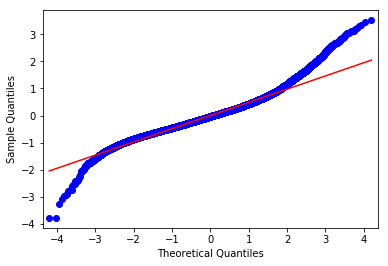

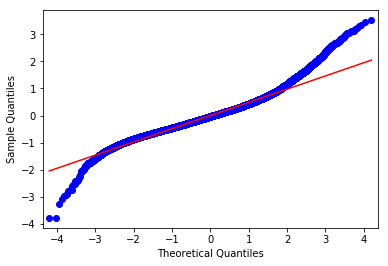

In [211]:
import statsmodels.api as statmodel
plot = model.resid # residuals
statmodel.qqplot(plot,line='r')

## Assumption 3:  Checking for Multicollinearity 
### 1 Correlation plot

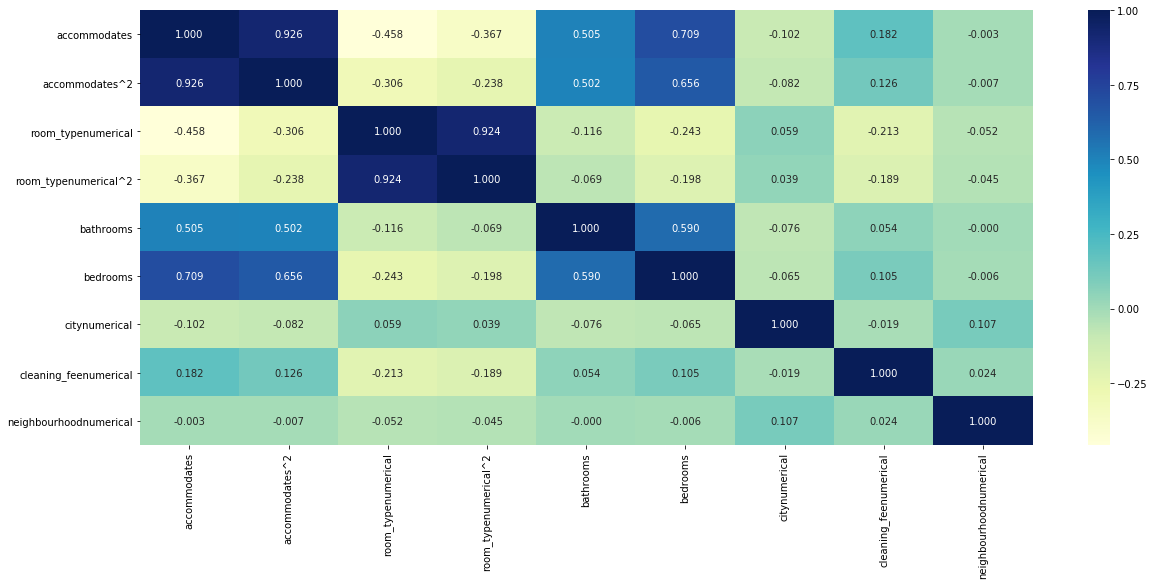

In [212]:
plt.figure(figsize=(20,8))
sns.heatmap(data = df[col_to_use_linear].corr(),cmap = 'YlGnBu', annot = True, fmt = '.3f')

plt.show()

In [213]:
### 2 Variance Inflation Factor (VIF) interpretation VIF = 1 No correaltion, 1-5 Moderate correlation, 5> Highlt correalted

#Test for Tolerance (Weisburd & Britt state that anything under .20 suggests serious multicollinearity in a model.) Thus, high tolerance(Eg: .84) indicates Low multicollinearity and low Tolerance(Eg: .12) indicates High multicollinearity  
T = 1-0.524**2
print ('Test for Tolerance: ',T)
VIF = (1/T)
print('Variance Inflation Factor',VIF)

Test for Tolerance:  0.725424
Variance Inflation Factor 1.3785041575685393


### Assumption 4 Homoscedasticity Test 
Through Homoscedasticity test we get to know that the residuals are more scattered horizontally which shows there is 

In [214]:
X = df[col_to_use_linear]
y = df['log_price']

x_trn , x_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=1)
linearModel = LinearRegression().fit(x_trn, y_trn)
linear_predictions = linearModel.predict(x_tst)
print(linear_predictions)
score = linearModel.score(x_tst, y_tst)
print(score)

[5.61203529 4.44115411 4.87238575 ... 3.77555627 4.58502639 4.03911483]
0.5189062651209401


56850    1.796495
68140    0.164016
23189   -0.778041
47255    0.059560
45933    0.105142
66955    0.642774
18553    0.235533
26117   -1.724268
65737   -0.721433
8915    -0.071789
33804    0.075669
53699   -0.615295
66129   -0.486138
66758   -0.069038
26421   -0.522339
39588    0.470279
55609    0.302794
4959    -0.617171
34101    0.027217
85      -0.387902
28928   -0.231992
38855    0.165990
44710   -0.068055
11209    0.135407
72178   -0.238934
15880    0.470930
49764   -0.003163
35643    0.316738
5030     0.366006
16550   -0.851035
           ...   
29392   -0.089001
55806    0.346930
37782   -0.517331
58369    0.148756
21911   -0.700668
7268    -0.033167
38471   -0.077702
58883    0.842672
57913   -0.667185
57034   -0.211570
43242    0.509417
8606    -0.163583
5802     0.549507
19394   -0.205154
47059   -0.375563
57711    0.551926
72562   -0.374530
65724   -0.461035
21188   -0.486727
64820    0.052925
70732    0.001139
21368   -0.467297
73801   -1.000145
37269    0.222251
65880   -0

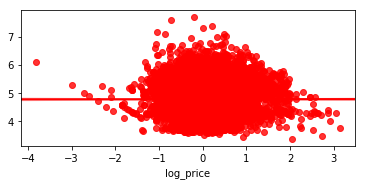

In [215]:
residual = y_tst - linear_predictions
print(residual)
fig, ax = plt.subplots(figsize=(6,2.5))
sns.regplot(residual, linear_predictions, color='r')
plt.show()

## Cross Validation of the model 

In [216]:
from sklearn.model_selection import cross_val_score, cross_val_predict
score1 = cross_val_score(linearModel, X, y, cv = 6)
print(score1)

[0.51445297 0.53772177 0.53838349 0.52484201 0.5180099  0.51803869]


In [217]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std() * 2))

Accuracy: 0.53 (+/- 0.02)


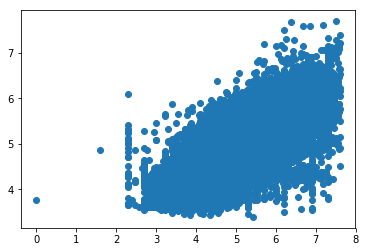

In [218]:
predictions = cross_val_predict(linearModel, X, y, cv=6)
plt.scatter(y, predictions)

## Compare AIC, BIC and adjusted R^2 


## PART B:  Binary Logistic Model 

In [286]:
df['Intercept'] = 1.0
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,neighbourhoodnumerical,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical,bathrooms^2,accommodates^2,room_typenumerical^2,log_price_numerical,Intercept
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,78,2,0,2,0,1.0,9,0,1,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,253,2,3,1,1,1.0,49,0,1,1.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,248,2,3,2,1,1.0,25,0,1,1.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,326,2,0,2,0,1.0,16,0,1,1.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,120,2,3,2,1,1.0,4,0,1,1.0


In [287]:
col_to_use_log = [ 'Intercept','accommodates','accommodates^2','room_typenumerical','room_typenumerical^2','bathrooms','bedrooms','citynumerical','cleaning_feenumerical','neighbourhoodnumerical']

In [288]:
X_log = df[col_to_use_log]
y_log = df['log_price_numerical']

x_trn_log , x_tst_log, y_trn_log , y_tst_log = train_test_split(X_log, y_log, test_size=0.2, random_state=1)


In [289]:
logistic_model = LogisticRegression()

In [290]:
logistic_model.fit(x_trn_log, y_trn_log)

C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [291]:
predicted = logistic_model.predict(x_tst_log)
predicted

array([1, 0, 1, ..., 0, 0, 0])

In [292]:
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_tst_log, predicted))

Accuracy score using Logistic regression is 0.7970046549281522


In [293]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_tst_log, predicted)
print(confusion_matrix)

[[5714 1730]
 [1279 6100]]


## Is the relationship significant? 

checking the p-value of every independent variable describes the realtionship with the dependent variable this is done by examining the null hypothesis H0 

Here, every feature have a p-value less than 0.5 (level of significance) thus they have a relationship with the log_price

In [294]:
model_log = sm.Logit(y_log, X_log).fit()
model_log.summary() 

Optimization terminated successfully.
         Current function value: 0.451803
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     log_price_numerical   No. Observations:                74111
Model:                           Logit   Df Residuals:                    74101
Method:                            MLE   Df Model:                            9
Date:                 Mon, 25 Feb 2019   Pseudo R-squ.:                  0.3482
Time:                         16:24:02   Log-Likelihood:                -33484.
converged:                        True   LL-Null:                       -51370.
                                         LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.8981      0.056    -34.083      0.000      -2.007      -1.789
accommodates               0.4322      0.017     25.362      0.000       0.399       0.466
accommodates^2            -0.0178      0.002    -11.815      0.000      -0.021      -0.015
room_typenumerical        -3.0258      0.058    -52.077      0.000      -3.140      -2.912
room_typenumerical^2       0.6773      0.046     14.805      0.000       0.588       0.767
bathrooms                  0.2703      0.025     10.999      0.000       0.222       0.318
bedrooms                   0.5041      0.019     27.182      0.000       0.468       0.540
citynumerical              0.2332      0.008     27.537      0.000       0.217       0.250
cleaning_feenumerical     -0.1511      0.023     -6.711      0.000      -0.195      -0.107
neighbourhoodnumerical     0.0010   4.89e-05     21.383      0.000       0.001       0.001
==========================================================================================
"""

In [295]:
from sklearn.metrics import classification_report 
print(classification_report(y_tst_log, predicted))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      7444
           1       0.78      0.83      0.80      7379

   micro avg       0.80      0.80      0.80     14823
   macro avg       0.80      0.80      0.80     14823
weighted avg       0.80      0.80      0.80     14823



## Are any model assumptions violated?
## Assumption 1: Binary logistic regression requires dependent variable to be binary 

In [ ]:
sns.pairplot(df[['log_price_numerical','accommodates','accommodates^2','room_typenumerical','room_typenumerical^2','bathrooms','bedrooms','citynumerical','cleaning_feenumerical','neighbourhoodnumerical']])

## Assumption 2: assumption of observation independence


### Logistic regression requires the observations to be independent of each other. In other words, the observations should not come from repeated measurements or matched data
###  Independence still cannot be assessed graphically; must know how the data were collected

## Assumption 3: Absence of Multicollinearity (by plotting correlation graph)

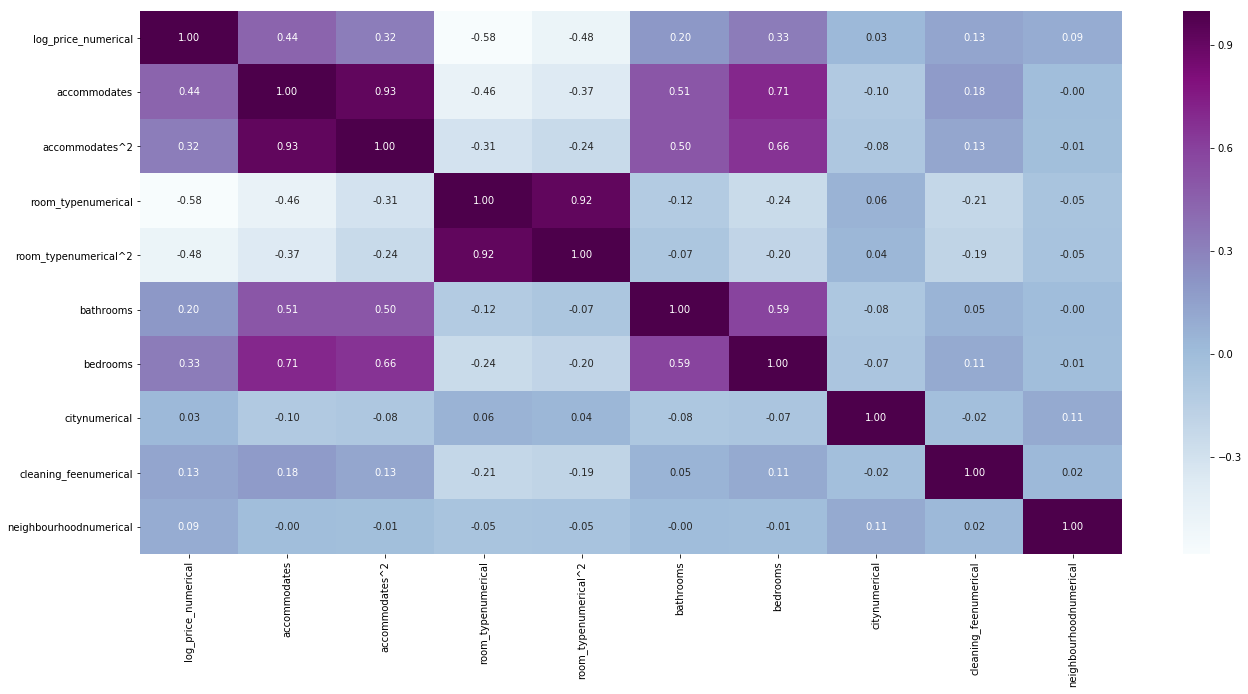

In [296]:

fig, ax = plt.subplots(figsize= (22,10))

ax = sns.heatmap(data = df[['log_price_numerical','accommodates','accommodates^2','room_typenumerical','room_typenumerical^2','bathrooms','bedrooms','citynumerical','cleaning_feenumerical','neighbourhoodnumerical']].corr(),cmap = 'BuPu',annot = True, fmt = '.2f')

plt.show()

## Assumption 4: Assumption of Linearity of independent variables and log odds 

Logistic regression does not require the continuous IV(s) to be linearly related to the DV. It does require the continuous IV(s) be linearly related to the log odds of the IV though. A way to test this is to plot the IV(s) in question and look for an S-shaped curve. Sometimes the S-shape will not be obvious. The plot should have a flat or flat-ish top and bottom with an increase or decreasing middle.

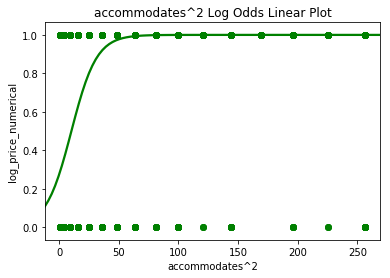

In [297]:
ax = sns.regplot(x= 'accommodates^2', y= 'log_price_numerical', data= df, logistic= True, color = 'g').set_title("accommodates^2 Log Odds Linear Plot")

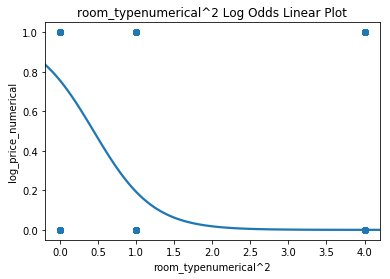

In [298]:
ax2 = sns.regplot(x= 'room_typenumerical^2', y= 'log_price_numerical', data= df, logistic= True).set_title("room_typenumerical^2 Log Odds Linear Plot")


## Assumption 5: assumption of lack of outliers 

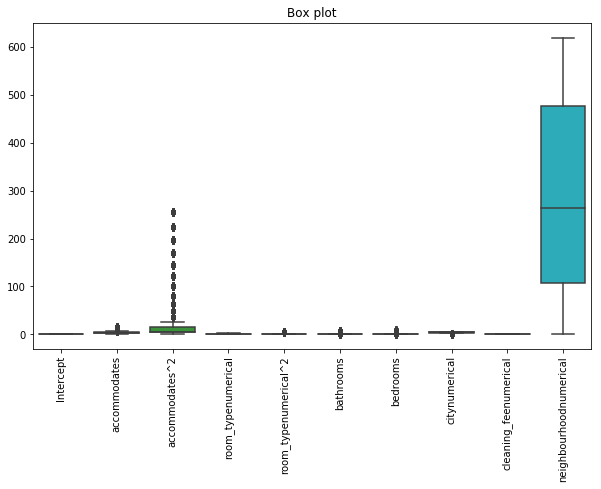

In [300]:
fig, ax = plt.subplots(figsize=(10,6))
boxplot = sns.boxplot(data= df[col_to_use_log], orient = 'v').set_title("Box plot")
plt.xticks(rotation=90)
plt.show()

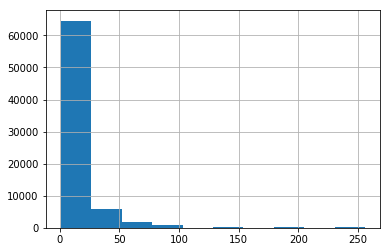

In [301]:
df['accommodates^2'].hist()

### Does the model make sense?  Interpret the meaning of each independent variable. 

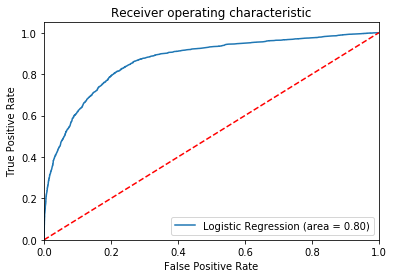

In [302]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_tst_log, predicted)
fpr, tpr, thresholds = roc_curve(y_tst_log, logistic_model.predict_proba(x_tst_log)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Cross Validation of the model 

In [308]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [309]:
scores = cross_val_score(logistic_model, X_log , y_log, cv=6)
print("Cross-validated scores:", scores.mean())

C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sapar\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Cross-validated scores: 0.7998542431482756


### Calculate the probability of getting the dependent variable

In [310]:
logistic_model.predict_proba(x_tst_log)[:,1]

array([0.94786448, 0.24863817, 0.62465607, ..., 0.05682898, 0.31086151,
       0.05460218])

In [311]:
# here it returns 95% confidence interval 
model_log.conf_int(alpha = 0.05)

,0,1
Intercept,-2.007204,-1.788908
accommodates,0.398766,0.465560
accommodates^2,-0.020721,-0.014824
room_typenumerical,-3.139727,-2.911965
room_typenumerical^2,0.587627,0.766955
bathrooms,0.222137,0.318473
bedrooms,0.467718,0.540408
citynumerical,0.216615,0.249814
cleaning_feenumerical,-0.195167,-0.106938
neighbourhoodnumerical,0.000950,0.001142


### odds ratio

In [312]:
np.exp(model_log.params)

Intercept                 0.149860
accommodates              1.540586
accommodates^2            0.982384
room_typenumerical        0.048517
room_typenumerical^2      1.968538
bathrooms                 1.310364
bedrooms                  1.655433
citynumerical             1.262652
cleaning_feenumerical     0.859803
neighbourhoodnumerical    1.001047
dtype: float64

In [313]:
params = model_log.params
conf = model_log.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
Intercept,0.134364,0.167143,0.149860
accommodates,1.489984,1.592907,1.540586
accommodates^2,0.979492,0.985285,0.982384
room_typenumerical,0.043295,0.054369,0.048517
room_typenumerical^2,1.799713,2.153200,1.968538
bathrooms,1.248743,1.375027,1.310364
bedrooms,1.596347,1.716706,1.655433
citynumerical,1.241866,1.283786,1.262652
cleaning_feenumerical,0.822697,0.898582,0.859803
neighbourhoodnumerical,1.000951,1.001143,1.001047


## Part C: Multi-Colinearity and Step-wise Regression  

###  Considering above Linear Regression Model 

### Step-wise Regression: Backward selection using standardised coefficients 

In [319]:
from sklearn.feature_selection import RFE
predictor = df[col_to_use_linear]

target = df['log_price']
names = predictor.columns
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select= 3)
rfe.fit(predictor,target)
 
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'bathrooms'), (1, 'bedrooms'), (1, 'room_typenumerical'), (2, 'room_typenumerical^2'), (3, 'cleaning_feenumerical'), (4, 'accommodates'), (5, 'citynumerical'), (6, 'accommodates^2'), (7, 'neighbourhoodnumerical')]


## PART D: Interaction Effects 

In [326]:
df['Sum1'] = df['bathrooms'] * df['bedrooms'] * df['room_typenumerical']
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,...,host_has_profile_picnumerical,host_response_ratenumerical,host_identity_verifiednumerical,instant_bookablenumerical,bathrooms^2,accommodates^2,room_typenumerical^2,log_price_numerical,Intercept,Sum1
count,7.411100e+04,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,57389.000000,74111.000000,73980.000000,...,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.0,74111.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868,...,1.991877,11.501370,1.668727,0.262458,1.864645,14.592827,0.530151,0.500412,1.0,0.562428
std,6.081735e+06,0.717394,2.153589,0.581258,3.080167,21.705322,37.828641,7.836556,0.851620,1.254142,...,0.114589,22.746247,0.476033,0.439973,2.902195,25.862344,0.774164,0.500003,0.0,0.867329
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,1.0,0.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000,...,2.000000,3.000000,2.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.0,0.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.0,1.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000,...,2.000000,80.000000,2.000000,1.000000,64.000000,256.000000,4.000000,1.000000,1.0,20.000000


In [327]:
model = ols("log_price ~ Sum1 + accommodates^2 + room_typenumerical^2 + bathrooms + bedrooms + cleaning_feenumerical + accommodates + room_typenumerical + neighbourhoodnumerical + citynumerical", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     8411.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:51:21   Log-Likelihood:                -52437.
No. Observations:               74111   AIC:                         1.049e+05
Df Residuals:                   74100   BIC:                         1.050e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.3706      0.011    393.152      0.000       4.349       4.392
Sum1                      -0.1344      0.004    -35.782      0.000      -0.142      -0.127
accommodates ^ 2          -0.0079      0.001     -8.292      0.000      -0.010      -0.006
room_typenumerical ^ 2    -0.0480      0.003    -15.357      0.000      -0.054      -0.042
bathrooms                  0.2094      0.004     47.841      0.000       0.201       0.218
bedrooms                   0.1319      0.003     40.000      0.000       0.125       0.138
cleaning_feenumerical     -0.0809      0.004    -19.240      0.000      -0.089      -0.073
accommodates               0.0664      0.002     39.092      0.000       0.063       0.070
room_typenumerical        -0.4400      0.006    -72.997      0.000      -0.452      -0.428
neighbourhoodnumerical     0.0002   9.08e-06     27.158      0.000       0.000       0.000
citynumerical              0.0554      0.002     35.841      0.000       0.052       0.058
==============================================================================
Omnibus:                    10158.184   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30086.227
Skew:                           0.732   Prob(JB):                         0.00
Kurtosis:                       5.757   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [334]:
estimators = df[col_to_use_linear].apply(lambda x: x.fillna(x.mean()),axis=0)
target = df.log_price
estimators
linreg = LinearRegression()


In [335]:
scores = cross_val_score(linreg, estimators, target, cv=6)

scores

array([0.51445297, 0.53772177, 0.53838349, 0.52484201, 0.5180099 ,
       0.51803869])

In [336]:
rmse_score = np.sqrt(scores)
rmse_score.mean()

0.7247055033604863

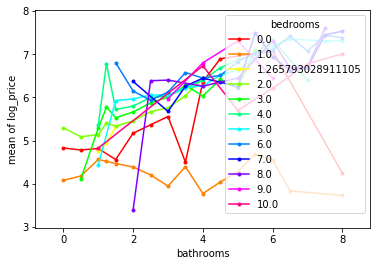

In [340]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(df.bathrooms, df.bedrooms, df.log_price)

## PART E: Regularization 

In [341]:
from sklearn.linear_model import Ridge
ridgeModel = Ridge().fit(x_trn, y_trn)
predictions = ridgeModel.predict(x_tst)
print(predictions)
print(ridgeModel.score(x_tst, y_tst))

[5.61200353 4.44124418 4.87232139 ... 3.77534929 4.58496957 4.03915161]
0.5189071963827236


## Conclusion:
From our observations we can conclude that the dataset selected and features that we have used for prediction analysis show that the linear cannot be very well fitted in the dataset. The Linear regression r^2 value is very small so the variance between predictions and the test data is very large. The residual values are large and the residual plot is not very scattered over the scale. So we can say the our features and the value we are predicting do not have a linear relationship. Whereas, the logistic model does a very good job in classifying the value of price values, whether the price values in greater than median or less than the median. So, from this we conclude that the features are good for classifying the price of a property. Also experiments show that even if we try to regularize the linear model by doing ridge regression we still are getting the high variance and large residuals. From the residuals and by cross validating the model we can conclude that the model is not overfitting the data.

## contributions statement:

1. We performed the EDA process and done pre-processing of the data by cleaning the data and converting the multicategorical data to numerical values using LabelEncoding.
2. We also tried to handle the outliers, and implemented the models using different algorithms 
3. Done LASSO, RFE, PCA methods to extract and reduce different features.
Thus, from this assignment I contributed 75% out of the overal work and other 15% of the code was used from different referral documentations 


## citations:
[1] https://scikit-learn.org/stable/ - for Regression models 

[2] https://seaborn.pydata.org/ - for graphical plotting 

[3] https://pandas.pydata.org/pandas-docs/stable/ - for creating the dataFrame, data manipulation and analysis 

[4] https://towardsdatascience.com/ - concept understanding reference

[5] https://www.kaggle.com/ - for selecting the dataset 

## license:

Copyright (c) <2019> <copyright Jinal Sapariya>

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.